## Machine Learning and Data Mining

## Kobe Bryant Shot Selection(Knowledge)
Fri 15 Apr 2016 – Mon 13 Jun 2016 

## 1. Problem statement
This data contains the location and circumstances of every field goal attempted by Kobe Bryant took during his 20-year career. Your task is to predict whether the basket went in (shot_made_flag).
These are the test set shots for which you must submit a prediction. You are provided a sample submission file with the correct shot_ids needed for a valid prediction.
To avoid leakage, your method should only train on events that occurred prior to the shot for which you are predicting! Since this is a playground competition with public answers, it's up to you to abide by this rule.

The field names are self explanatory and contain the following attributes:
    action_type
    combined_shot_type
    game_event_id
    game_id
    lat
    loc_x
    loc_y
    lon
    minutes_remaining
    period
    playoffs
    season 
    seconds_remaining
    shot_distance
    shot_made_flag (this is what you are predicting)
    shot_type
    shot_zone_area
    shot_zone_basic
    shot_zone_range
    team_id
    team_name
    game_date
    matchup
    opponent
    shot_id

The following structure of the report is suggested:
1. Problem statement;
2. Dataset summary with basic statistics and respective plots;
3. Methodology (justify the selected ML/DM approach);
4. Experiment setup and results;
5. Discussion (comparison, interpretations, etc.);
6. Conclusion.

## 2. Dataset summary with basic statistics and respective plots;

In [2]:
from __future__ import print_function, division
import pandas as pd
import numpy as np
import pylab as plt
from sklearn.preprocessing import LabelEncoder, normalize
import seaborn as sns
import networkx as nx
import gc
# from sklearn.linear_model import RidgeClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import roc_auc_score, precision_recall_fscore_support

%matplotlib inline
plt.rcParams['figure.figsize'] = (13, 3)
pd.options.display.float_format = lambda x: '%g' % x
pd.options.display.max_columns = 25
#import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Circle, Rectangle, Arc
from sklearn import mixture
from sklearn import ensemble
from sklearn import cross_validation
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import log_loss
import time
import itertools
import operator

C:\Users\sobitxon\AppData\Local\Continuum\Anaconda3\envs\py27\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
data = pd.read_csv('../data/data.csv')

In [4]:
data.head(5)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.103,10,1,0,2000-01,27,18,nan,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.427,10,1,0,2000-01,22,15,0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.371,7,1,0,2000-01,45,16,1,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.132,6,1,0,2000-01,52,22,0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.27,6,2,0,2000-01,19,0,1,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [5]:
#data 
action_type = data.action_type.value_counts()
print("\n\naction_types:")
print(action_type.head(5))
combined_shot_type = data.combined_shot_type.value_counts()
print("\n\ncombined_shot_types:")
print(data.combined_shot_type.head(5))
print("\n\nNumber of Unique combined_shot_type", data.combined_shot_type.nunique())
print("\n\nNumber of Unique game_event_id", data.game_event_id.nunique())
print("\n\nNumber of Unique period", data.period.nunique())
print("\n\nNumber of Unique playoffs", data.playoffs.nunique())
print("\n\nNumber of Unique season", data.season.nunique())
print("\n\nNumber of Unique shot_distance", data.shot_distance.nunique())
print(data.season.head(7))
print("\n\nNumber of Unique shot_made_flag", data.shot_distance.nunique())
data.shot_made_flag.value_counts()
print("\n\nshot_type:")
print(data.shot_type.value_counts())
print("Number of Unique shot_type", data.shot_type.nunique())
print("\n\nshot_zone_area:")
print(data.shot_zone_area.value_counts())
print("Number of Unique shot_zone_area", data.shot_zone_area.nunique())
print("\n\nshot_zone_basic:")
print(data.shot_zone_basic.value_counts())
print("Number of Unique shot_zone_basic", data.shot_zone_basic.nunique())
print("\n\nshot_zone_range:")
print(data.shot_zone_range.value_counts())
print("Number of Unique shot_zone_range", data.shot_zone_range.nunique())

print("\n\nmatchup :")
#print(data.matchup .value_counts())
print("Number of Unique matchup", data.matchup .nunique())
print("\n\nopponent :")
#print(data.opponent.value_counts())
print("Number of Unique opponent", data.opponent.nunique())
print("\n\nshot_id :")
#print(data.shot_id.value_counts())
print("Number of Unique shot_id", data.shot_id.nunique())





action_types:
Jump Shot               18880
Layup Shot               2567
Driving Layup Shot       1978
Turnaround Jump Shot     1057
Fadeaway Jump Shot       1048
Name: action_type, dtype: int64


combined_shot_types:
0    Jump Shot
1    Jump Shot
2    Jump Shot
3    Jump Shot
4         Dunk
Name: combined_shot_type, dtype: object


Number of Unique combined_shot_type 6


Number of Unique game_event_id 620


Number of Unique period 7


Number of Unique playoffs 2


Number of Unique season 20


Number of Unique shot_distance 74
0    2000-01
1    2000-01
2    2000-01
3    2000-01
4    2000-01
5    2000-01
6    2000-01
Name: season, dtype: object


Number of Unique shot_made_flag 74


shot_type:
2PT Field Goal    24271
3PT Field Goal     6426
Name: shot_type, dtype: int64
Number of Unique shot_type 2


shot_zone_area:
Center(C)                13455
Right Side Center(RC)     4776
Right Side(R)             4588
Left Side Center(LC)      4044
Left Side(L)              3751
Back Court(BC) 

action_type - This column contain - type of the shot which was made by Koby. For example, Jump Shot(18880), Layup Shot(2567), Driving Layup Shot(1978), Turnaround Jump Shot(1057), Fadeaway Jump Shot(1048),...
combined_shot_type - type of combined shot. There are only 6 unique datafields in this column(Jump Shot(23485),Layup(5448),Dunk(1286), Tip Shot(184), Hook Shot(153), Bank Shot(141)
shot_made_flag - 
global address of Koby's place is given by longitude and latitude:
    lat -  (Latitude lines are a numerical way to measure how far north or south of the equator a place is located). 
    lon - (longitude) Longitude lines are a numerical way to show/measure how far a location is east or west of a universal
    vertical line called the Prime Meridian)
game_event_id - this id of events which was made by Koby
game_id - id of the game. each game id is unique. For example,  20000012 is id of the game beetween LAL @ POR in 2000-10-31.
loc_x - location of the Koby in game by X-axis
loc_y - location of the Koby in game by Y-axis
minutes_remaining - The measure of the time. It shows how many minutes left to the end of period. 
seconds_remaining - The measure of the time. It shows how many seconds left to the end of period. 
period - the quarter or half (there are 4 periods in regular match and extra - times.  Command will play while draw in a match. In our dataset maximum period in match is equal to 7.
playoffs - play -of of game. it shows it was game playof matches or nor (0 or 1)

season - it contain year of the season. For example, season 2010/2011(2010-11); 1997/1998(1997-98). There are a lot data from 20 season matches in our data. 
shot_distance - distance to the Backboard
shot_made_flag - this flag shows that Koby made shot or not.
shot_type - it contain shot type(2point or 3 point). For example, 2PT Field Goal(24271), 3PT Field Goal(6426)
shot_zone_area - It shows from which zone Koby made shot
shot_zone_basic - basic zone from which Koby made shot
shot_zone_basic - distance from which Koby made shot(in foot)
team_id - Koby's team id
team_name -the list of teams for which Koby played
game_date- show date of the game
matchup - it shows which command play with each other
opponent - The name of opponent team 
shot_id - id of shot


## Submission File

For each missing shot_made_flag in the data set, you should predict a probability that Kobe made the field goal. The file should have a header and the following format:

shot_id,shot_made_flag
1,0.5
8,0.5
17,0.5
etc.

## Evaluation metric -  ## Logarithmic Loss 
The logarithm of the likelihood function for a Bernouli random distribution.

In plain English, this error metric is used where contestants have to predict that something is true or false with a probability (likelihood) ranging from definitely true (1) to equally true (0.5) to definitely false(0).

The use of log on the error provides extreme punishments for being both confident and wrong. In the worst possible case, a single prediction that something is definitely true (1) when it is actually false will add infinite to your error score and make every other entry pointless. In Kaggle competitions, predictions are bounded away from the extremes by a small value in order to prevent this.

logloss=−1N∑i=1N∑j=1Myijlog(pij)
logloss=−1N∑i=1N∑j=1Myijlog⁡(pij)
logloss=−1N∑i=1N(yilog(pi)+(1−yi)log(1−pi))

In [6]:
data = data[data['shot_made_flag'].notnull()].reset_index()

In [7]:
#%% add some temporal columns to the data

data['game_date_DT'] = pd.to_datetime(data['game_date'])
data['dayOfWeek'] = data['game_date_DT'].dt.dayofweek
data['dayOfYear'] = data['game_date_DT'].dt.dayofyear

data['secondsFromPeriodEnd'] = 60*data['minutes_remaining']+data['seconds_remaining']
data['secondsFromPeriodStart'] = 60*(11-data['minutes_remaining'])+(60-data['seconds_remaining'])
data['secondsFromGameStart'] = (data['period'] <= 4).astype(int)*(data['period']-1)*12*60 + (data['period'] > 4).astype(int)*((data['period']-4)*5*60 + 3*12*60) + data['secondsFromPeriodStart']

# look at first couple of rows and verify that everything is good
data.ix[:20,['period','minutes_remaining','seconds_remaining','secondsFromGameStart']]

,period,minutes_remaining,seconds_remaining,secondsFromGameStart
0,1,10,22,98
1,1,7,45,255
2,1,6,52,308
3,2,6,19,1061
4,3,9,32,1588
5,3,8,52,1628
6,3,6,12,1788
7,3,3,36,1944
8,3,1,56,2044
9,1,11,0,60


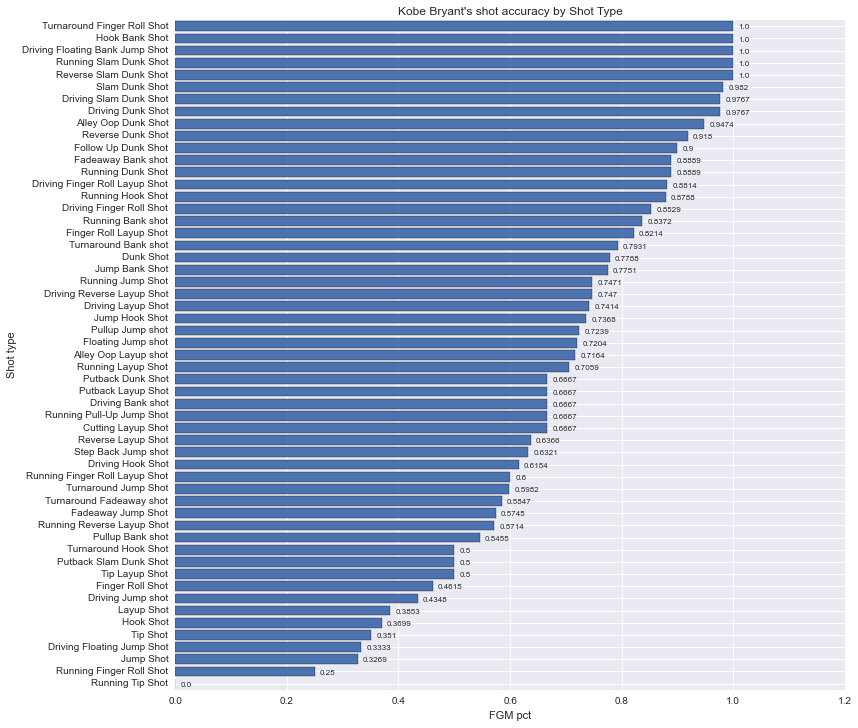

In [8]:
#Let's look at action_type. We suspect it will give a good indication about the difficulty of the shot
df_action = data.dropna()[['action_type','shot_made_flag']].groupby(['action_type']).mean().sort_values(by='shot_made_flag',ascending=1)
plt.figure(figsize=(12,12))
barpos = np.arange(len(df_action.index))+.5
plt.barh(barpos,df_action['shot_made_flag'],align='center')
plt.yticks(barpos, df_action.index)
for i, v in enumerate(df_action['shot_made_flag']):
    plt.text(v + 0.01, i + .25, str(round(v,4)), fontsize=8)
plt.xlim(0,1.2)
plt.ylim(0,len(df_action.index)) #set row limit
plt.title('Kobe Bryant\'s shot accuracy by Shot Type')
plt.xlabel('FGM pct')
plt.ylabel('Shot type')
plt.show()
plt.savefig('Kobe Bryants shot accuracy by Shot Type.png')

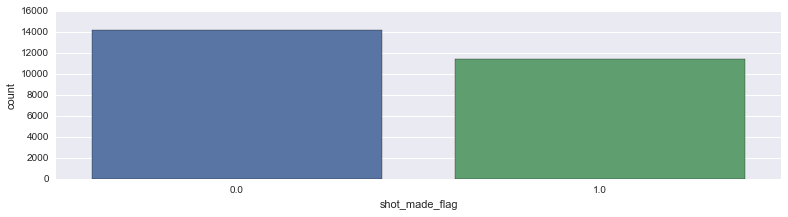

In [9]:
sns.countplot(x='shot_made_flag', data=data)

In [10]:
data['shot_made_flag'].value_counts() / data['shot_made_flag'].shape

0   0.553839
1   0.446161
Name: shot_made_flag, dtype: float64

#### He scores around 45% of his shots.
#### Period accuracy
Number of shots taken in each period:

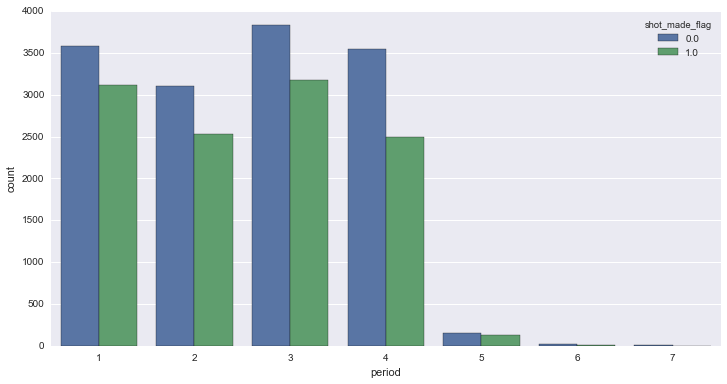

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(x="period", hue="shot_made_flag", data=data)

### Accuracy of shot made flag

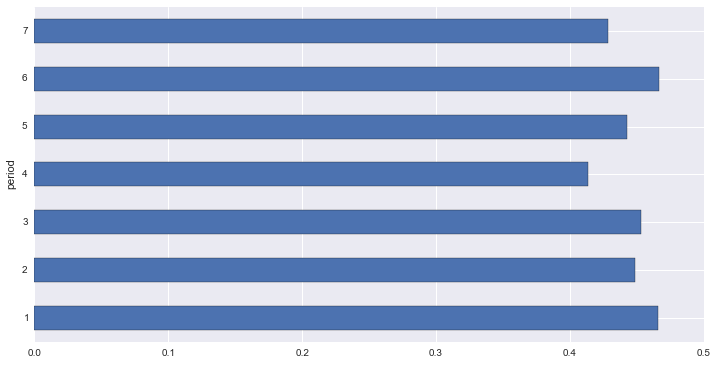

In [13]:
period_acc = data['shot_made_flag'].groupby(data['period']).mean()
period_acc.plot(kind='barh', figsize=(12, 6))

#### Accuracy depending on shot type
Number of different kinds of shots:

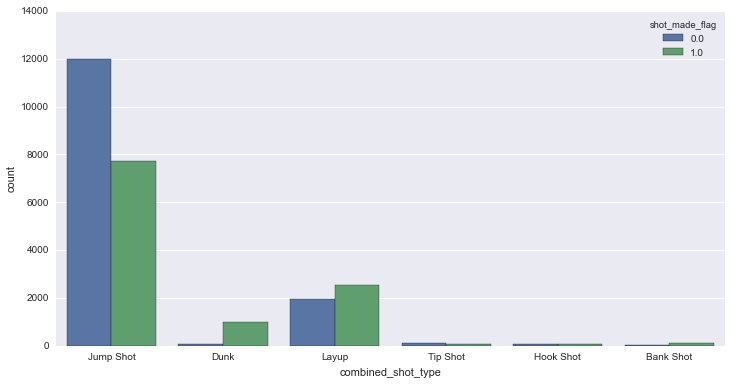

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(x="combined_shot_type", hue="shot_made_flag", data=data)

### Accuracy Shot_TYPE

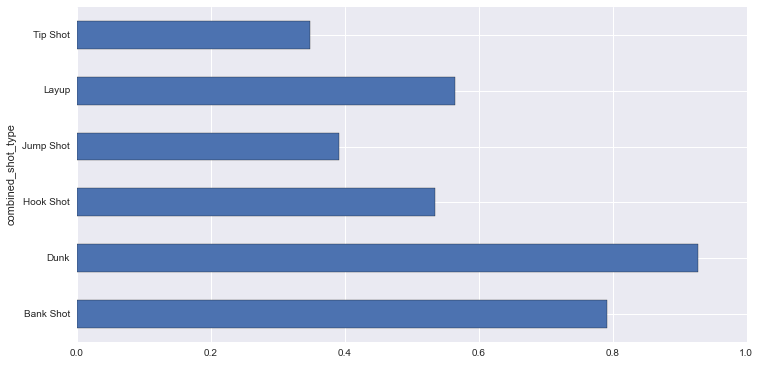

In [17]:
shot_type_acc = data['shot_made_flag'].groupby(data['combined_shot_type']).mean()
shot_type_acc.plot(kind='barh', figsize=(12, 6))

### CAREER ACCURACY
Number of shots over seasons:

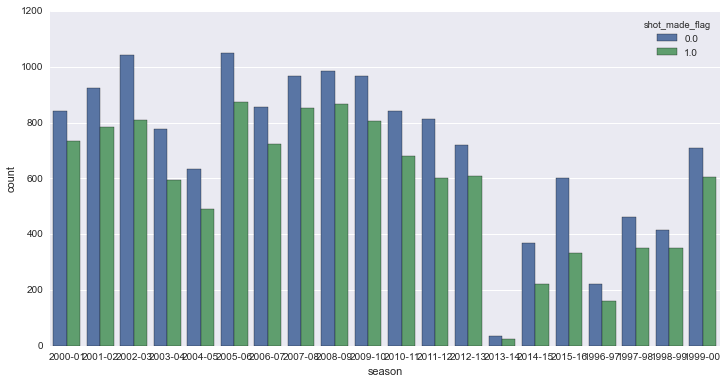

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(x="season", hue="shot_made_flag", data=data)

### Accuracy over season

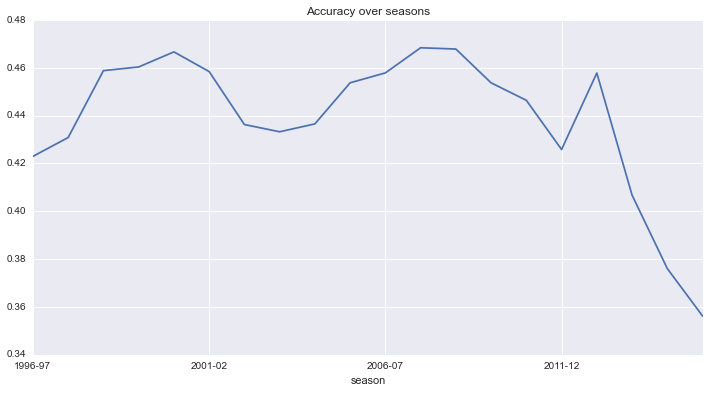

In [19]:
season_acc = data['shot_made_flag'].groupby(data['season']).mean()
season_acc.plot(figsize=(12, 6), title='Accuracy over seasons')

#### Season freshness


Number of shots each month:

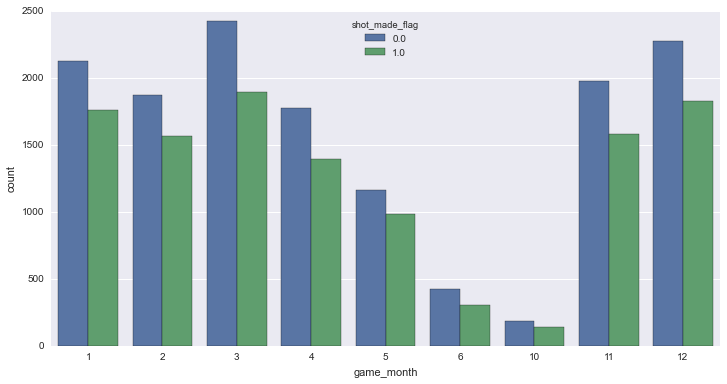

In [20]:
df = pd.read_csv('../data/data.csv')
df['game_date'] = pd.to_datetime(df['game_date'])
df['game_year'] = df['game_date'].dt.year
df['game_month'] = df['game_date'].dt.month
df['game_day'] = df['game_date'].dt.dayofweek

plt.figure(figsize=(12,6))
sns.countplot(x="game_month", hue="shot_made_flag", data=df)

#### Home game VS away

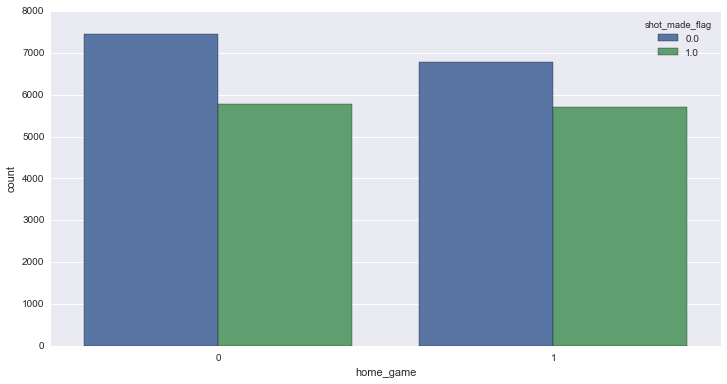

In [21]:
df['home_game'] = df['matchup'].str.contains('vs.').astype(int)
# not_needed.append('matchup')
plt.figure(figsize=(12,6))
sns.countplot(x="home_game", hue="shot_made_flag", data=df)

#### Opponents number of shots 

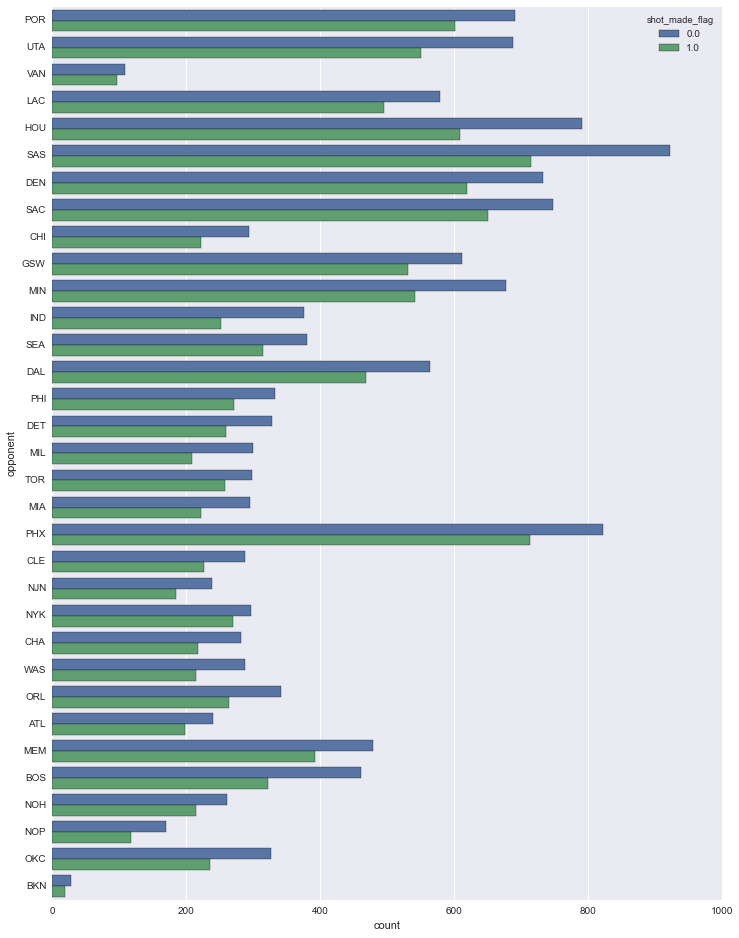

In [22]:
plt.figure(figsize=(12,16))
sns.countplot(y="opponent", hue="shot_made_flag", data=data)

C:\Users\sobitxon\AppData\Local\Continuum\Anaconda3\envs\py27\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


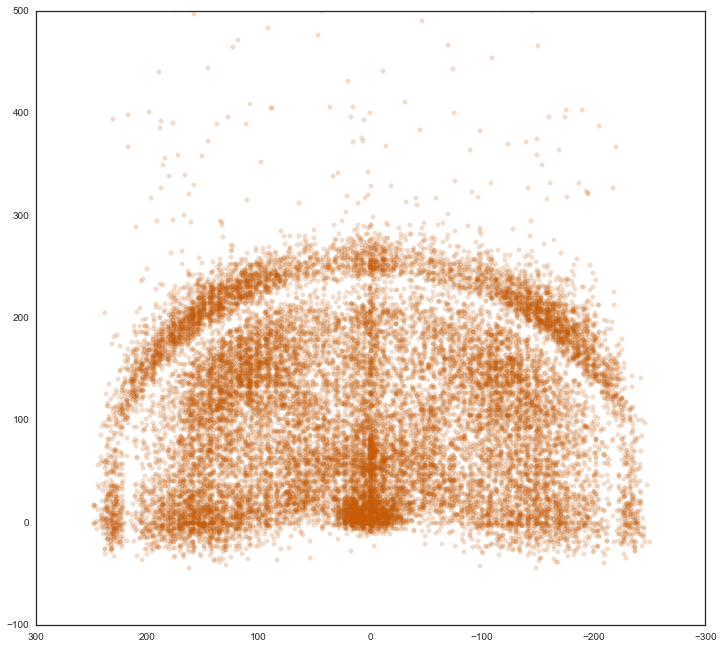

In [23]:
# creating a basic scatter plot to show the data
alpha=0.2

sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
plt.scatter(data['loc_x'],data['loc_y'], color='#c65b08', alpha=alpha)
# note that x-axis values are the inverse of what they actually should be
# only showing shots up to 50 feet away
plt.xlim(300,-300)
plt.ylim(-100,500)
plt.show()

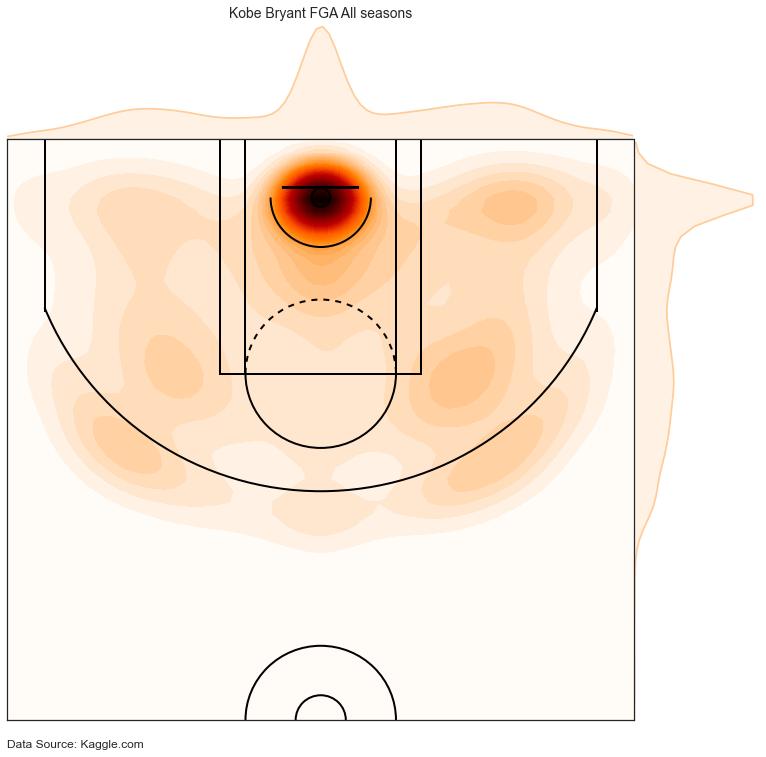

In [24]:

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax
# create our jointplot

# get our colormap for the main kde plot
# Note we can extract a color from cmap to use for 
# the plots that lie on the side and top axes
cmap=plt.cm.gist_heat_r

# n_levels sets the number of contour lines for the main kde plot
joint_shot_chart = sns.jointplot(data['loc_x'],data['loc_y'], stat_func=None,
                                 kind='kde', space=0, color=cmap(0.1),
                                 cmap=cmap, n_levels=50)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')


# Add a title
ax.set_title('Kobe Bryant FGA All seasons', 
             y=1.2, fontsize=14)

# Add Data Source 
ax.text(-250,445,'Data Source: Kaggle.com',
        fontsize=12)

# Court visualization of misses and shots

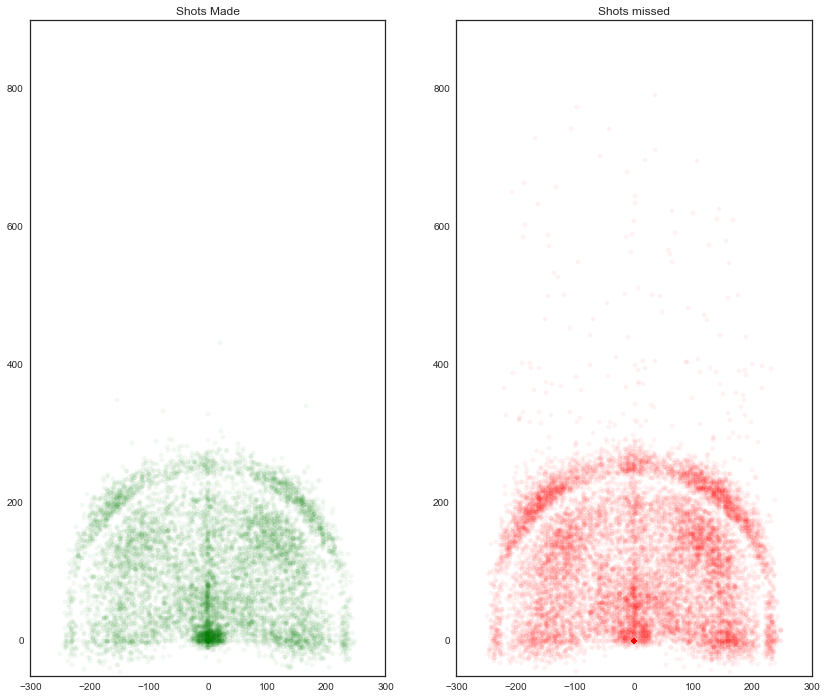

In [25]:
# Court visualization of misses and shots
court_scale, alpha = 7, 0.05
plt.figure(figsize=(2 * court_scale, court_scale*(84.0/50.0)))
# hit
plt.subplot(121)
h = data.loc[data.shot_made_flag == 1]
plt.scatter(h.loc_x, h.loc_y, color='green', alpha=alpha)
plt.title('Shots Made')
ax = plt.gca()
ax.set_ylim([-50, 900])
# miss
plt.subplot(122)
h = data.loc[data.shot_made_flag == 0]
plt.scatter(h.loc_x, h.loc_y, color='red', alpha=alpha)
plt.title('Shots missed')
ax = plt.gca()
ax.set_ylim([-50, 900])
plt.savefig('shots_made_and_missed.png')

# ##Shooting accuracy with shot distance

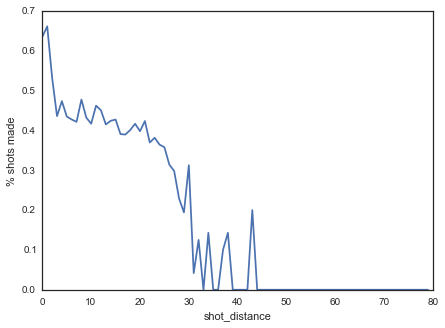

In [26]:
def get_acc(df, against):
    ct = pd.crosstab(df.shot_made_flag, df[against]).apply(lambda x:x/x.sum(), axis=0)
    x, y = ct.columns, ct.values[1, :]
    plt.figure(figsize=(7, 5))
    plt.plot(x, y)
    plt.xlabel(against)
    plt.ylabel('% shots made')
    plt.savefig(against + '_vs_accuracy.png')
get_acc(data, 'shot_distance')

### plot the shot attempts as a function of time (from start of game) with several different binnings

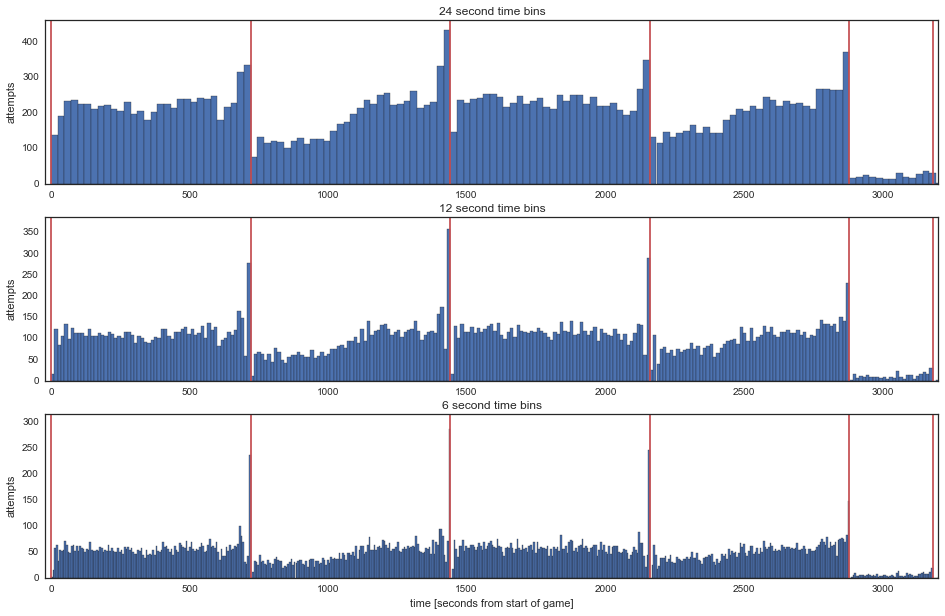

In [27]:
#%% plot the shot attempts as a function of time (from start of game) with several different binnings
plt.rcParams['figure.figsize'] = (16, 10)

binsSizes = [24,12,6]

plt.figure();
for k, binSizeInSeconds in enumerate(binsSizes):
    timeBins = np.arange(0,60*(4*12+3*5),binSizeInSeconds)+0.01
    attemptsAsFunctionOfTime, b = np.histogram(data['secondsFromGameStart'], bins=timeBins)     
    
    maxHeight = max(attemptsAsFunctionOfTime) + 30
    barWidth = 0.999*(timeBins[1]-timeBins[0])
    plt.subplot(len(binsSizes),1,k+1); 
    plt.bar(timeBins[:-1],attemptsAsFunctionOfTime, align='edge', width=barWidth); plt.title(str(binSizeInSeconds) + ' second time bins')
    plt.vlines(x=[0,12*60,2*12*60,3*12*60,4*12*60,4*12*60+5*60,4*12*60+2*5*60,4*12*60+3*5*60], ymin=0,ymax=maxHeight, colors='r')
    plt.xlim((-20,3200)); plt.ylim((0,maxHeight)); plt.ylabel('attempts')
plt.xlabel('time [seconds from start of game]')

## It looks like Kobe is entrusted to take the last shot of every period
it also looks like he's usually on the bench at the start of 2nd and 4th periods

## Now let's plot the accuracy as function of time since game start as well

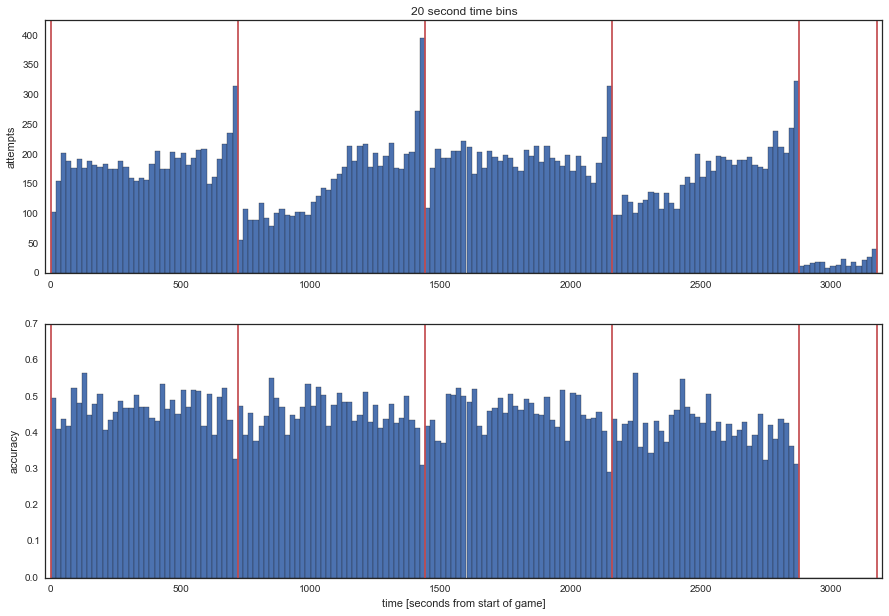

In [28]:
#%% plot the accuracy as a function of time
plt.rcParams['figure.figsize'] = (15, 10)

binSizeInSeconds = 20
timeBins = np.arange(0,60*(4*12+3*5),binSizeInSeconds)+0.01
attemptsAsFunctionOfTime, b = np.histogram(data['secondsFromGameStart'], bins=timeBins)     
madeAttemptsAsFunctionOfTime, b = np.histogram(data.ix[data['shot_made_flag']==1,'secondsFromGameStart'], bins=timeBins)     
accuracyAsFunctionOfTime = madeAttemptsAsFunctionOfTime.astype(float)/attemptsAsFunctionOfTime
accuracyAsFunctionOfTime[attemptsAsFunctionOfTime <= 50] = 0 # zero accuracy in bins that don't have enough samples

maxHeight = max(attemptsAsFunctionOfTime) + 30
barWidth = 0.999*(timeBins[1]-timeBins[0])
 
plt.figure();
plt.subplot(2,1,1); plt.bar(timeBins[:-1],attemptsAsFunctionOfTime, align='edge', width=barWidth); 
plt.xlim((-20,3200)); plt.ylim((0,maxHeight)); plt.ylabel('attempts'); plt.title(str(binSizeInSeconds) + ' second time bins')
plt.vlines(x=[0,12*60,2*12*60,3*12*60,4*12*60,4*12*60+5*60,4*12*60+2*5*60,4*12*60+3*5*60], ymin=0,ymax=maxHeight, colors='r')
plt.subplot(2,1,2); plt.bar(timeBins[:-1],accuracyAsFunctionOfTime, align='edge', width=barWidth); 
plt.xlim((-20,3200)); plt.ylabel('accuracy'); plt.xlabel('time [seconds from start of game]')
plt.vlines(x=[0,12*60,2*12*60,3*12*60,4*12*60,4*12*60+5*60,4*12*60+2*5*60,4*12*60+3*5*60], ymin=0.0,ymax=0.7, colors='r')

## Note that the accuracy of these "last second shots" is consisently lower than usuall
this is probably due to the fact that a large amonut of these shots are from very far away

## Now let's continue our initial exploration and examine the spatial location aspect of kobe's shots
we'll do this by building a gaussian mixture model that tries to explain Kobe's shot locations

In [29]:
#%% cluster the shot attempts of kobe using GMM on their location

numGaussians = 13
gaussianMixtureModel = mixture.GMM(n_components=numGaussians, covariance_type='full', 
                                   params='wmc', init_params='wmc',
                                   random_state=1, n_init=3,  verbose=0)
gaussianMixtureModel.fit(data.ix[:,['loc_x','loc_y']])

data['shotLocationCluster'] = gaussianMixtureModel.predict(data.ix[:,['loc_x','loc_y']])

In [30]:
def Draw2DGaussians(gaussianMixtureModel, ellipseColors, ellipseTextMessages):
    
    fig, h = plt.subplots();
    for i, (mean, covarianceMatrix) in enumerate(zip(gaussianMixtureModel.means_, gaussianMixtureModel._get_covars())):
        # get the eigen vectors and eigen values of the covariance matrix
        v, w = np.linalg.eigh(covarianceMatrix)
        v = 2.5*np.sqrt(v) # go to units of standard deviation instead of variance
        
        # calculate the ellipse angle and two axis length and draw it
        u = w[0] / np.linalg.norm(w[0])    
        angle = np.arctan(u[1] / u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        currEllipse = mpl.patches.Ellipse(mean, v[0], v[1], 180 + angle, color=ellipseColors[i])
        currEllipse.set_alpha(0.5)
        h.add_artist(currEllipse)
        h.text(mean[0]+7, mean[1]-1, ellipseTextMessages[i], fontsize=12)

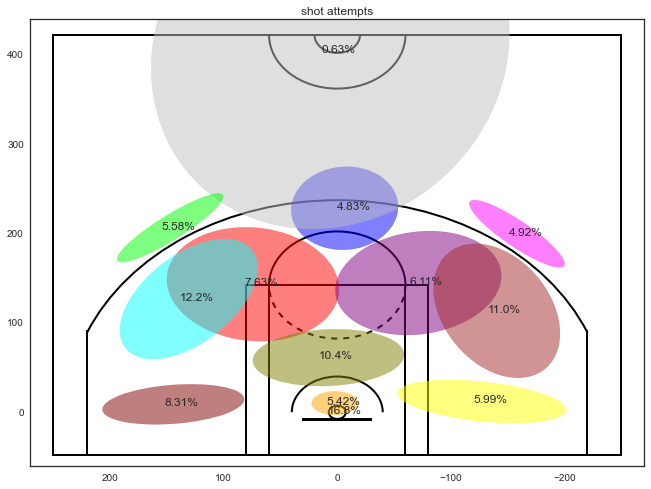

In [31]:
#%% show gaussian mixture elipses of shot attempts
plt.rcParams['figure.figsize'] = (11, 8)

ellipseTextMessages = [str(100*gaussianMixtureModel.weights_[x])[:4]+'%' for x in range(numGaussians)]
ellipseColors = ['red','green','purple','cyan','magenta','yellow','blue','orange','silver','maroon','lime','olive','brown','darkblue']
Draw2DGaussians(gaussianMixtureModel, ellipseColors, ellipseTextMessages)
draw_court(outer_lines=True); plt.ylim(-60,440); plt.xlim(270,-270); plt.title('shot attempts')

### for each cluster, calculate it's individual accuracy and plot it

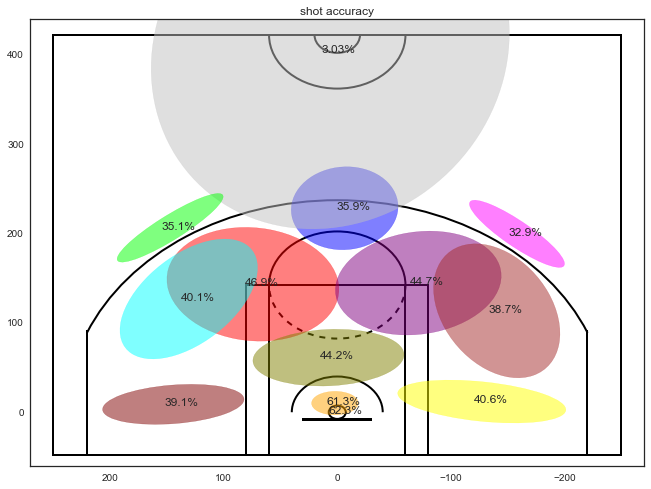

In [32]:

#%% for each cluster, calculate it's individual accuracy and plot it

plt.rcParams['figure.figsize'] = (11, 8)

variableCategories = data['shotLocationCluster'].value_counts().index.tolist()

clusterAccuracy = {}
for category in variableCategories:
    shotsAttempted = np.array(data['shotLocationCluster'] == category).sum()
    shotsMade = np.array(data.ix[data['shotLocationCluster'] == category,'shot_made_flag'] == 1).sum()
    clusterAccuracy[category] = float(shotsMade)/shotsAttempted

ellipseTextMessages = [str(100*clusterAccuracy[x])[:4]+'%' for x in range(numGaussians)]
Draw2DGaussians(gaussianMixtureModel, ellipseColors, ellipseTextMessages)
draw_court(outer_lines=True); plt.ylim(-60,440); plt.xlim(270,-270); plt.title('shot accuracy')

### create a new table for shot difficulty model

In [33]:
#%% create a new table for shot difficulty model

def FactorizeCategoricalVariable(inputDB,categoricalVarName):
    opponentCategories = inputDB[categoricalVarName].value_counts().index.tolist()
    
    outputDB = pd.DataFrame()
    for category in opponentCategories:
        featureName = categoricalVarName + ': ' + str(category)
        outputDB[featureName] = (inputDB[categoricalVarName] == category).astype(int)

    return outputDB

featuresDB = pd.DataFrame()
featuresDB['homeGame'] = data['matchup'].apply(lambda x: 1 if (x.find('@') < 0) else 0)
featuresDB = pd.concat([featuresDB,FactorizeCategoricalVariable(data,'opponent')],axis=1)
featuresDB = pd.concat([featuresDB,FactorizeCategoricalVariable(data,'action_type')],axis=1)
featuresDB = pd.concat([featuresDB,FactorizeCategoricalVariable(data,'shot_type')],axis=1)
featuresDB = pd.concat([featuresDB,FactorizeCategoricalVariable(data,'combined_shot_type')],axis=1)
featuresDB = pd.concat([featuresDB,FactorizeCategoricalVariable(data,'shot_zone_basic')],axis=1)
featuresDB = pd.concat([featuresDB,FactorizeCategoricalVariable(data,'shot_zone_area')],axis=1)
featuresDB = pd.concat([featuresDB,FactorizeCategoricalVariable(data,'shot_zone_range')],axis=1)
featuresDB = pd.concat([featuresDB,FactorizeCategoricalVariable(data,'shotLocationCluster')],axis=1)

featuresDB['playoffGame'] = data['playoffs']
featuresDB['locX'] = data['loc_x']
featuresDB['locY'] = data['loc_y']
featuresDB['distanceFromBasket'] = data['shot_distance']
featuresDB['secondsFromPeriodEnd'] = data['secondsFromPeriodEnd']

featuresDB['dayOfWeek_cycX'] = np.sin(2*np.pi*(data['dayOfWeek']/7))
featuresDB['dayOfWeek_cycY'] = np.cos(2*np.pi*(data['dayOfWeek']/7))
featuresDB['timeOfYear_cycX'] = np.sin(2*np.pi*(data['dayOfYear']/365))
featuresDB['timeOfYear_cycY'] = np.cos(2*np.pi*(data['dayOfYear']/365))

labelsDB = data['shot_made_flag']

#%% build a simple model and make sure it doesnt overfit

randomSeed = 1
numFolds = 4

mainLearner = ensemble.ExtraTreesClassifier(n_estimators=500, max_depth=5, 
                                            min_samples_leaf=120, max_features=120, 
                                            criterion='entropy', bootstrap=False, 
                                            n_jobs=-1, random_state=randomSeed)
                        
crossValidationIterator = cross_validation.StratifiedKFold(labelsDB, n_folds=numFolds, 
                                                           shuffle=True, random_state=randomSeed)

startTime = time.time()
trainAccuracy = []; validAccuracy = [];
trainLogLosses = []; validLogLosses = []
for trainInds, validInds in crossValidationIterator:
    # split to train and valid sets
    X_train_CV = featuresDB.ix[trainInds,:]
    y_train_CV = labelsDB.iloc[trainInds]
    X_valid_CV = featuresDB.ix[validInds,:]
    y_valid_CV = labelsDB.iloc[validInds]
    
    # train learner
    mainLearner.fit(X_train_CV, y_train_CV)
    
    # make predictions
    y_train_hat_mainLearner = mainLearner.predict_proba(X_train_CV)[:,1]
    y_valid_hat_mainLearner = mainLearner.predict_proba(X_valid_CV)[:,1]

    # store results
    trainAccuracy.append(accuracy(y_train_CV, y_train_hat_mainLearner > 0.5))
    validAccuracy.append(accuracy(y_valid_CV, y_valid_hat_mainLearner > 0.5))
    trainLogLosses.append(log_loss(y_train_CV, y_train_hat_mainLearner))
    validLogLosses.append(log_loss(y_valid_CV, y_valid_hat_mainLearner))

print("-----------------------------------------------------")
print("total (train,valid) Accuracy = (%.5f,%.5f). took %.2f minutes" % (np.mean(trainAccuracy),np.mean(validAccuracy), (time.time()-startTime)/60))
print("total (train,valid) Log Loss = (%.5f,%.5f). took %.2f minutes" % (np.mean(trainLogLosses),np.mean(validLogLosses), (time.time()-startTime)/60))
print("-----------------------------------------------------")


-----------------------------------------------------
total (train,valid) Accuracy = (0.67920,0.67833). took 0.94 minutes
total (train,valid) Log Loss = (0.60813,0.61089). took 0.94 minutes
-----------------------------------------------------


In [34]:
mainLearner.fit(featuresDB, labelsDB)
data['shotDifficulty'] = mainLearner.predict_proba(featuresDB)[:,1]

# just to get a feel for what determins shot difficulty, look at feature importances
featureInds = mainLearner.feature_importances_.argsort()[::-1]
featureImportance = pd.DataFrame(np.concatenate((featuresDB.columns[featureInds,None], mainLearner.feature_importances_[featureInds,None]), axis=1),
                                  columns=['featureName', 'importanceET'])


In [35]:

#%% collect data given that kobe made or missed last shot

timeBetweenShotsDict = {}
timeBetweenShotsDict['madeLast'] = []
timeBetweenShotsDict['missedLast'] = []

changeInDistFromBasketDict = {}
changeInDistFromBasketDict['madeLast'] = []
changeInDistFromBasketDict['missedLast'] = []

changeInShotDifficultyDict = {}
changeInShotDifficultyDict['madeLast'] = []
changeInShotDifficultyDict['missedLast'] = []

afterMadeShotsList = []
afterMissedShotsList = []

for shot in range(1,data.shape[0]):

    # make sure the current shot and last shot were all in the same period of the same game
    sameGame   = data.ix[shot,'game_date'] == data.ix[shot-1,'game_date']
    samePeriod = data.ix[shot,'period']    == data.ix[shot-1,'period']

    if samePeriod and sameGame:
        madeLastShot       = data.ix[shot-1,'shot_made_flag'] == 1
        missedLastShot     = data.ix[shot-1,'shot_made_flag'] == 0
        
        timeDifferenceFromLastShot = data.ix[shot,'secondsFromGameStart']     - data.ix[shot-1,'secondsFromGameStart']
        distDifferenceFromLastShot = data.ix[shot,'shot_distance']            - data.ix[shot-1,'shot_distance']
        shotDifficultyDifferenceFromLastShot = data.ix[shot,'shotDifficulty'] - data.ix[shot-1,'shotDifficulty']

        # check for currupt data points (assuming all samples should have been chronologically ordered)
        if timeDifferenceFromLastShot < 0:
            continue
        
        if madeLastShot:
            timeBetweenShotsDict['madeLast'].append(timeDifferenceFromLastShot)
            changeInDistFromBasketDict['madeLast'].append(distDifferenceFromLastShot)
            changeInShotDifficultyDict['madeLast'].append(shotDifficultyDifferenceFromLastShot)
            afterMadeShotsList.append(shot)
            
        if missedLastShot:
            timeBetweenShotsDict['missedLast'].append(timeDifferenceFromLastShot)
            changeInDistFromBasketDict['missedLast'].append(distDifferenceFromLastShot)
            changeInShotDifficultyDict['missedLast'].append(shotDifficultyDifferenceFromLastShot)
            afterMissedShotsList.append(shot)

afterMissedData = data.ix[afterMissedShotsList,:]
afterMadeData = data.ix[afterMadeShotsList,:]

shotChancesListAfterMade = afterMadeData['shotDifficulty'].tolist()
totalAttemptsAfterMade   = afterMadeData.shape[0]
totalMadeAfterMade       = np.array(afterMadeData['shot_made_flag'] == 1).sum()

shotChancesListAfterMissed = afterMissedData['shotDifficulty'].tolist()
totalAttemptsAfterMissed   = afterMissedData.shape[0]
totalMadeAfterMissed = np.array(afterMissedData['shot_made_flag'] == 1).sum()

# after making a shot, kobe is a more confident and throws from further away

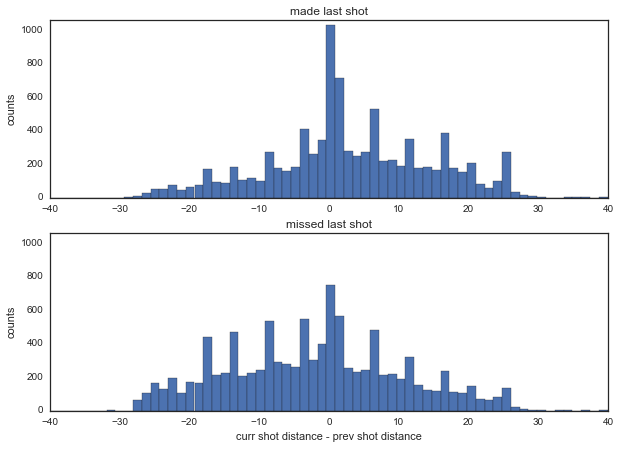

In [36]:
#%% after making a shot, kobe is a more confident and throws from further away
plt.rcParams['figure.figsize'] = (10, 7)

jointHist, distDiffBins = np.histogram(changeInDistFromBasketDict['madeLast']+changeInDistFromBasketDict['missedLast'],bins=100,density=False)
barWidth = 0.999*(distDiffBins[1]-distDiffBins[0])

distDiffHist_GivenMadeLastShot, b = np.histogram(changeInDistFromBasketDict['madeLast'],bins=distDiffBins)
distDiffHist_GivenMissedLastShot, b = np.histogram(changeInDistFromBasketDict['missedLast'],bins=distDiffBins)
maxHeight = max(max(distDiffHist_GivenMadeLastShot),max(distDiffHist_GivenMissedLastShot)) + 30

plt.figure();
plt.subplot(2,1,1); plt.bar(distDiffBins[:-1], distDiffHist_GivenMadeLastShot, width=barWidth); plt.xlim((-40,40)); plt.ylim((0,maxHeight))
plt.title('made last shot'); plt.ylabel('counts')
plt.subplot(2,1,2); plt.bar(distDiffBins[:-1], distDiffHist_GivenMissedLastShot, width=barWidth); plt.xlim((-40,40)); plt.ylim((0,maxHeight))
plt.title('missed last shot'); plt.xlabel('curr shot distance - prev shot distance'); plt.ylabel('counts')

#### Kobe throws from close by, and then from far away, this will result in positive values of "curr shot distance - prev shot distance" and vise versa. If Kobe throws from far away and then from close by, this will result in negative values. 
#### We can clearly see that the made group of shots is more leaning to the right
#### It therefore looks like Kobe is more confident after making a shot, and because of it, he takes a larger risk and throws from further away


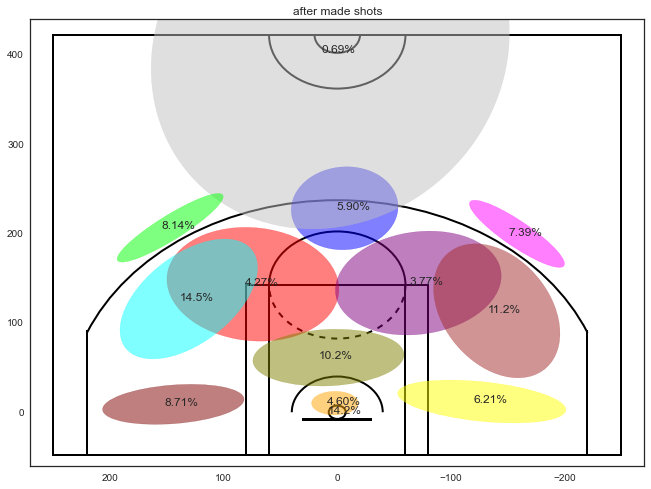

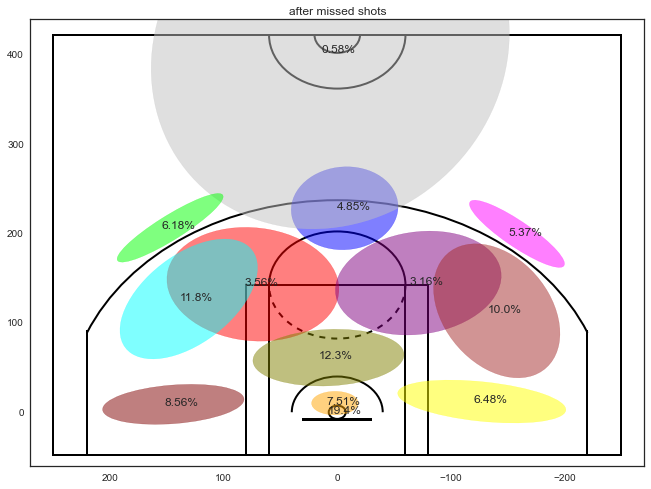

In [37]:
#%% show shot attempts of after made and after missed shots

plt.rcParams['figure.figsize'] = (11, 8)

variableCategories = afterMadeData['shotLocationCluster'].value_counts().index.tolist()
clusterFrequency = {}
for category in variableCategories:
    shotsAttempted = np.array(afterMadeData['shotLocationCluster'] == category).sum()
    clusterFrequency[category] = float(shotsAttempted)/afterMadeData.shape[0]

ellipseTextMessages = [str(100*clusterFrequency[x])[:4]+'%' for x in range(numGaussians)]
Draw2DGaussians(gaussianMixtureModel, ellipseColors, ellipseTextMessages)
draw_court(outer_lines=True); plt.ylim(-60,440); plt.xlim(270,-270); plt.title('after made shots')

variableCategories = afterMissedData['shotLocationCluster'].value_counts().index.tolist()
clusterFrequency = {}
for category in variableCategories:
    shotsAttempted = np.array(afterMissedData['shotLocationCluster'] == category).sum()
    clusterFrequency[category] = float(shotsAttempted)/afterMissedData.shape[0]

ellipseTextMessages = [str(100*clusterFrequency[x])[:4]+'%' for x in range(numGaussians)]
Draw2DGaussians(gaussianMixtureModel, ellipseColors, ellipseTextMessages)
draw_court(outer_lines=True); plt.ylim(-60,440); plt.xlim(270,-270); plt.title('after missed shots')

#### Now it's very evident that after missing a shot, kobe is much more likely to throw directly from under the basket relative to after making a shot (27% vs 19%)
It's also very evident that after making a shot, kobe is much more likely to try a 3 pointer as his next shot

In [38]:
data.head(10)

,index,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,...,game_date,matchup,opponent,shot_id,game_date_DT,dayOfWeek,dayOfYear,secondsFromPeriodEnd,secondsFromPeriodStart,secondsFromGameStart,shotLocationCluster,shotDifficulty
0,1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.427,10,1,0,...,2000-10-31,LAL @ POR,POR,2,2000-10-31,1,305,622,98,98,5,0.319879
1,2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.371,7,1,0,...,2000-10-31,LAL @ POR,POR,3,2000-10-31,1,305,465,255,255,12,0.36056
2,3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.132,6,1,0,...,2000-10-31,LAL @ POR,POR,4,2000-10-31,1,305,412,308,308,3,0.382724
3,4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.27,6,2,0,...,2000-10-31,LAL @ POR,POR,5,2000-10-31,1,305,379,341,1061,1,0.960706
4,5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.415,9,3,0,...,2000-10-31,LAL @ POR,POR,6,2000-10-31,1,305,572,148,1588,5,0.3172
5,6,Layup Shot,Layup,251,20000012,34.0443,0,0,-118.27,8,3,0,...,2000-10-31,LAL @ POR,POR,7,2000-10-31,1,305,532,188,1628,1,0.396616
6,8,Jump Shot,Jump Shot,265,20000012,33.9363,-65,108,-118.335,6,3,0,...,2000-10-31,LAL @ POR,POR,9,2000-10-31,1,305,372,348,1788,2,0.327588
7,9,Running Jump Shot,Jump Shot,294,20000012,33.9193,-33,125,-118.303,3,3,0,...,2000-10-31,LAL @ POR,POR,10,2000-10-31,1,305,216,504,1944,2,0.596606
8,10,Jump Shot,Jump Shot,309,20000012,33.8063,-94,238,-118.364,1,3,0,...,2000-10-31,LAL @ POR,POR,11,2000-10-31,1,305,116,604,2044,4,0.326527
9,11,Jump Shot,Jump Shot,4,20000019,33.9173,121,127,-118.149,11,1,0,...,2000-11-01,LAL vs. UTA,UTA,12,2000-11-01,2,306,660,60,60,3,0.356259


## 3 Methodology (justify the selected ML/DM approach);
## 4. Experiment setup and results;
## 5. Discussion (comparison, interpretations, etc.);

In [24]:
from __future__ import print_function, division
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns
import xgboost as xgb
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import normalize
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import log_loss
from sklearn.cross_validation import cross_val_score
%matplotlib inline
pd.options.display.max_columns = 25
pl.rcParams['figure.figsize'] = 17, 5 

In [3]:
data = pd.read_csv('../data/data.csv', parse_dates=['game_date'])
data.seconds_remaining = data.minutes_remaining*60 + data.seconds_remaining
data = data.sort_values(
    by=['game_date', 'game_id', 'period', 'seconds_remaining'], 
    ascending=[True, True, True, False])
data['home_play'] = data.matchup.str.contains('vs').astype('int')
submission = pd.DataFrame()
submission['shot_id'] = data.ix[data.shot_made_flag.isnull(), 'shot_id']
data.drop(['team_id', 'game_event_id', 'game_id', 'shot_id', 'minutes_remaining', 'season', 'team_name', 'matchup'], axis=1, inplace=True)
data.head()

,action_type,combined_shot_type,lat,loc_x,loc_y,lon,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,opponent,home_play
22901,Jump Shot,Jump Shot,33.9283,-140,116,-118.4098,1,0,42,18,0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1996-11-03,MIN,1
22902,Jump Shot,Jump Shot,33.9473,-131,97,-118.4008,2,0,608,16,0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1996-11-05,NYK,0
22903,Jump Shot,Jump Shot,33.8633,-142,181,-118.4118,2,0,517,23,1,3PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1996-11-06,CHA,0
22904,Jump Shot,Jump Shot,34.0443,0,0,-118.2698,2,0,394,0,0,3PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1996-11-06,CHA,0
22905,Jump Shot,Jump Shot,33.9063,-10,138,-118.2798,2,0,327,13,1,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,1996-11-06,CHA,0


### Dividing all features into categorical and numerical in order to treat them separately. We'll construct dummy features from categorical ones and normalize numerical features for linear models.

In [4]:
categorical_columns = ['period', 'action_type', 'combined_shot_type', 'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'opponent']
numerical_columns = ['period'] + [x for x in data.columns if x not in categorical_columns + ['shot_made_flag', 'game_date']]

In [5]:
dict_vectorizer = DictVectorizer(sparse=False)
X_cat = dict_vectorizer.fit_transform(data[categorical_columns].T.astype('str').to_dict().values())

### $X$ is the matrix of generated features: dummy features and normalized numerical features. $y$ is the target vector

In [6]:
X = np.hstack((normalize(data[numerical_columns].values, norm='l1'), X_cat))
y = data.shot_made_flag.values
test_indices = np.where(data.shot_made_flag.isnull() == True)[0]
train_indices = np.where(data.shot_made_flag.notnull() == True)[0]
X_test = X[test_indices]
X = X[train_indices]
y = y[train_indices]
feature_names = numerical_columns + dict_vectorizer.feature_names_

### Test data was chosen randomly from all years, and the first test entry is Kobe Bryant's 5th shot. So, in order to avoid leakage, we cannot use data after the event that we're predicting. 

### In this competition the biggest issue of model evaluation is to avoid leakage and overfitting. Simple using cross-validation isn't enough, because we have time-dependent data. We cannot divide data randomly by validation and train. Train events must appear before all validation events. In order to accomplish this task, we dividing all data into folds, and at each fold $k$  we train on all $1 .. k-1$ folds and validating only on the $k$-th fold. It's important that we had sorted our data depending on time of the event. This way we're avoiding leakage and giving the right estimation of predicting power of our models. 

In [7]:
def cross_validation_by_time(y, n_folds=20):
    fold_size = y.shape[0]//n_folds
    for fold in range(n_folds):
        train_index = np.arange(y.shape[0] - (fold + 1)*fold_size)
        test_index = np.arange(y.shape[0] - (fold + 1)*fold_size, y.shape[0] - fold*fold_size)
        yield train_index, test_index

### When we're using our custom cross-validation, that uses time ordering with n_folds=20, we're predicting approximately in a year or two ahead and training on all previous events

In [8]:
(data.game_date.iloc[-1] - data.game_date.iloc[data.shape[0] - data.shape[0]//20])

Timedelta('509 days 00:00:00')

In [11]:
def print_cross_val_scores(clf):
    scores = -cross_val_score(clf, X, y, scoring='log_loss', cv=cross_validation_by_time(y))
    print(*zip(['%d Fold' % (k + 1) for k in range(scores.shape[0])], scores), sep='\n')
    print('MEAN', scores.mean(), 'STD', scores.std())

### For linear models the indicator of feature importance is the weight in a linear combination. And if the feature is always nonnegative, greater the weight, greater the influence of the feature (we're assuming that data is normalized before)

In [12]:
def construct_feature_importances(values):
    feature_importances = pd.DataFrame()
    feature_importances['value'] = values
    feature_importances['name'] = feature_names
    return feature_importances.sort_values(by='value', ascending=False)

### If an algorithm doesn't have a possibility of online updating, we can only go through the test entries and if we have some training data between two test entries, we have to train again on the whole data, that was before the test event. 

In [13]:
def make_test_prediction(clf):
    y_test = np.zeros(test_indices.shape[0])
    previous_index = 0
    for i, index in enumerate(test_indices):
        if index != previous_index + 1:
            clf.fit(X[train_indices < index],
                    y[train_indices < index])
        y_test[i] = clf.predict_proba(X_test[i].reshape(1, -1))[0][1]
        previous_index = index
    return y_test

### If an algorithm support online learning, we're using partial_fit from sklearn and updating on all appeared train events, predicting test events when needed

In [14]:
def online_test_prediction(clf):
    y_test = np.zeros(test_indices.shape[0])
    previous_index = 0
    for i, index in enumerate(test_indices):
        if index != previous_index + 1:
            clf.partial_fit(X[(train_indices >= previous_index) & (train_indices < index)],
                            y[(train_indices >= previous_index) & (train_indices < index)], classes=[0, 1])
        y_test[i] = clf.predict_proba(X_test[i].reshape(1, -1))[0][1]
        previous_index = index
    return y_test

# Models
## Random Forest
### 1 Fold corresponds to training on almost all data and predicting only the last fold. 20 Fold corresponds to training only on one first (by time) fold and predicting the next fold

In [15]:
rf = RandomForestClassifier(n_estimators=200, max_features=20, criterion='entropy', max_depth=8, n_jobs=-1, random_state=25)
clf = rf
print_cross_val_scores(clf)

('1 Fold', 0.6407607833611173)
('2 Fold', 0.65274559302870949)
('3 Fold', 0.65981905091715853)
('4 Fold', 0.66805385086165325)
('5 Fold', 0.6744230097820535)
('6 Fold', 0.67917740800398574)
('7 Fold', 0.66884809103307885)
('8 Fold', 0.66975662400543534)
('9 Fold', 0.66622679585187694)
('10 Fold', 0.6722780747545799)
('11 Fold', 0.66716370668285951)
('12 Fold', 0.67969621695713089)
('13 Fold', 0.65208772054819697)
('14 Fold', 0.66022582715519695)
('15 Fold', 0.66293516940403352)
('16 Fold', 0.67014602539627821)
('17 Fold', 0.67052706150941821)
('18 Fold', 0.669793015633254)
('19 Fold', 0.65905177564777884)
('20 Fold', 0.84751161520849871)
MEAN 0.674561370787 STD 0.0407231509643


### feature importance for RF is F-score of each feature. We can see that seconds remaining to the period end is the valuable feature

In [16]:
clf.fit(X, y)
feature_importances = construct_feature_importances(clf.feature_importances_)
feature_importances.head(10)

,value,name
7,0.248386,shot_distance
6,0.148176,seconds_remaining
3,0.128337,loc_y
2,0.081550,loc_x
1,0.077619,lat
4,0.068854,lon
0,0.046712,period
8,0.034866,home_play
5,0.018173,playoffs
107,0.004427,period=3


In [32]:
# y_test = make_test_prediction(clf)
# submission['shot_made_flag'] = y_test
# submission.to_csv('submission_rf.csv', index=False)

## Linear Model: SGD with log loss for online learning

### If our data is linear, then SGD with log loss function will be the best approximation in our case (because of the evaluation metric)

In [17]:
sgd = SGDClassifier(loss='log', alpha=1, n_iter=100, n_jobs=-1, random_state=25)
clf = sgd
print_cross_val_scores(clf)

('1 Fold', 0.66802596017678628)
('2 Fold', 0.6860697467005652)
('3 Fold', 0.68594836216043997)
('4 Fold', 0.68628482764952858)
('5 Fold', 0.68851269371288837)
('6 Fold', 0.68909908663857089)
('7 Fold', 0.69052326888852544)
('8 Fold', 0.69295750522207256)
('9 Fold', 0.69168806180347686)
('10 Fold', 0.68937664227452089)
('11 Fold', 0.69066163460622876)
('12 Fold', 0.68784188919733058)
('13 Fold', 0.68335414358734337)
('14 Fold', 0.68490840794426222)
('15 Fold', 0.68716228379447408)
('16 Fold', 0.68802285591409773)
('17 Fold', 0.69011942673101112)
('18 Fold', 0.69176121702576232)
('19 Fold', 0.69188283395523564)
('20 Fold', 0.70383839326056052)
MEAN 0.688401962062 STD 0.00623715711829


In [18]:
clf.fit(X, y)
feature_importances = construct_feature_importances(clf.coef_[0])
feature_importances.head(10)

,value,name
4,0.001027,lon
6,0.000725,seconds_remaining
51,0.000230,action_type=Running Layup Shot
85,0.000227,opponent=MEM
22,0.000167,action_type=Driving Reverse Layup Shot
24,0.000159,action_type=Dunk Shot
42,0.000148,action_type=Reverse Dunk Shot
53,0.000107,action_type=Running Reverse Layup Shot
33,0.000096,action_type=Jump Bank Shot
84,0.000084,opponent=LAC


In [19]:
feature_importances.tail()

,value,name
124,-0.011654,shot_zone_basic=Mid-Range
3,-0.012538,loc_y
35,-0.016415,action_type=Jump Shot
112,-0.019954,shot_type=2PT Field Goal
69,-0.020464,combined_shot_type=Jump Shot


### Using online updates we can form our submission very quickly 

In [20]:
clf = SGDClassifier(loss='log', alpha=1, n_iter=100, n_jobs=-1, random_state=25)
y_test = online_test_prediction(clf)
submission['shot_made_flag'] = y_test
submission.to_csv('submission_sgd.csv', index=False)

## Linear Discriminant Analysis

In [21]:
clf = LinearDiscriminantAnalysis(solver='lsqr')
print_cross_val_scores(clf)

('1 Fold', 0.67052274065762851)
('2 Fold', 0.65612503791582766)
('3 Fold', 0.66973512802406954)
('4 Fold', 0.66695406444047722)
('5 Fold', 0.95379964335911549)
('6 Fold', 0.76294305715085586)
('7 Fold', 0.67667545267922946)
('8 Fold', 0.6918372534137579)
('9 Fold', 0.67265605883665314)
('10 Fold', 0.67935694327297291)
('11 Fold', 0.6760928798533502)
('12 Fold', 0.70584042064817121)
('13 Fold', 0.6596694978523332)
('14 Fold', 0.8714814099108561)
('15 Fold', 0.6844772685662881)
('16 Fold', 0.69260930521431852)
('17 Fold', 0.70135270512143633)
('18 Fold', 0.693680097294053)
('19 Fold', 1.0448109279970268)
('20 Fold', 17.107992046077257)
MEAN 1.54693059691 STD 3.5714297331


## Boosting: XGB

In [25]:
xgbclf = xgb.XGBClassifier(max_depth=3, learning_rate=0.05, n_estimators=200, seed=25)
clf = xgbclf
print_cross_val_scores(clf)

('1 Fold', 0.63832280395053487)
('2 Fold', 0.64843019608094865)
('3 Fold', 0.65548954127106895)
('4 Fold', 0.66617580760281958)
('5 Fold', 0.67206679774604949)
('6 Fold', 0.68025538711765099)
('7 Fold', 0.66838586567741498)
('8 Fold', 0.6726869706650529)
('9 Fold', 0.66368233241326524)
('10 Fold', 0.67263366254713863)
('11 Fold', 0.66817654134717264)
('12 Fold', 0.68235690420859052)
('13 Fold', 0.65159217662807567)
('14 Fold', 0.66209689634808588)
('15 Fold', 0.66434554165850079)
('16 Fold', 0.67848305725361979)
('17 Fold', 0.67532088785980626)
('18 Fold', 0.67299291065595235)
('19 Fold', 0.67231886585553491)
('20 Fold', 0.91289410130860649)
MEAN 0.67893536241 STD 0.054756111616


In [26]:
clf.fit(X, y)
feature_importances = pd.Series(clf.booster().get_fscore())
feature_importances.index = [int(x[1:]) for x in feature_importances.index]
feature_importances.sort_index(inplace=True)
values = np.zeros(len(feature_names))
values[feature_importances.index] = feature_importances.values/feature_importances.values.sum()
feature_importances = construct_feature_importances(values)
feature_importances.head(10)

,value,name
2,0.157978,loc_x
4,0.138231,lon
7,0.127962,shot_distance
1,0.109795,lat
6,0.100316,seconds_remaining
3,0.089258,loc_y
0,0.029226,period
5,0.027646,playoffs
8,0.022907,home_play
107,0.018167,period=3


In [ ]:
# y_test = make_test_prediction(clf)
# submission['shot_made_flag'] = y_test
# submission.to_csv('submission_xgb.csv', index=False)

# Voting ensemble
### Using soft-voting ensemble of SGD, XGB, RF we can a little bit reduce the loss

In [27]:
estimators = []
estimators.append(('sgd', sgd))
estimators.append(('xgb', xgbclf))
estimators.append(('rf', rf))
clf = VotingClassifier(estimators, voting='soft', weights=[1,3,2])

In [28]:
print_cross_val_scores(clf)

('1 Fold', 0.64211998824684591)
('2 Fold', 0.65346811021279139)
('3 Fold', 0.6597539273896601)
('4 Fold', 0.66846329102340096)
('5 Fold', 0.67337157118196767)
('6 Fold', 0.67810247259889167)
('7 Fold', 0.66931198380395318)
('8 Fold', 0.67199585345432244)
('9 Fold', 0.6658532115022211)
('10 Fold', 0.67192555785629915)
('11 Fold', 0.66805649361825847)
('12 Fold', 0.67785705115517159)
('13 Fold', 0.65264856778206981)
('14 Fold', 0.66095382951200543)
('15 Fold', 0.66318454558341267)
('16 Fold', 0.67107999958942866)
('17 Fold', 0.67067393992638891)
('18 Fold', 0.6693697568176683)
('19 Fold', 0.66364946595634922)
('20 Fold', 0.82224486402659269)
MEAN 0.673704224062 STD 0.0351437095156


In [ ]:
# y_test = make_test_prediction(clf)
# submission['shot_made_flag'] = y_test
# submission.to_csv('submission_xgb.csv', index=False)

## 6. Conclusion.

In conclusion We can say that:

   It's hard to predict his early shots, because we don't have enough data at the beginning of his career and all test events were spread across his 20-year career. We have seen that classifiers got better results in estimating Kobe's shot probability as we increased training data. But the random prediction (probability = 0.5 ) is not so far from the best estimated probabilities. Hence, we can conlude that there are a lot of outliers in the data or we don't have neccessary information about each shot (Maybe, we are missing information about physical and psychological condition about player during the game, but there is a big question how to measure the latter one).